In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ipaddress
import numpy as np
from scipy import stats
from scipy.stats import chi2_contingency
from datetime import datetime, timedelta
import math
import missingno as msno
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('/Users/joshitha/Downloads/Data.xlsx', skiprows=[1])

In [3]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
new_df = df[['Q13 CODE', 'Q14 CODE', 'Q16 CODE', 'Q17 CODE', 'Q18 CODE','Q19 CODE', 'Q20 CODE', 'Q22 CODE', 'Q23 CODE','Q24 CODE', 'Q25 CODE', 'Q26 CODE','Q27 CODE', 'Q28 CODE', 'Q29 CODE', 'Q30 CODE']]

# Instantiate
scaler = StandardScaler()

# fit_transform
df_scaled = scaler.fit_transform(new_df)
df_scaled.shape

(363, 16)

In [4]:
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = ['Q13 CODE', 'Q14 CODE', 'Q16 CODE', 'Q17 CODE', 'Q18 CODE','Q19 CODE', 'Q20 CODE', 'Q22 CODE', 'Q23 CODE','Q24 CODE', 'Q25 CODE', 'Q26 CODE','Q27 CODE', 'Q28 CODE', 'Q29 CODE', 'Q30 CODE']
df_scaled.head()

,Q13 CODE,Q14 CODE,Q16 CODE,Q17 CODE,Q18 CODE,Q19 CODE,Q20 CODE,Q22 CODE,Q23 CODE,Q24 CODE,Q25 CODE,Q26 CODE,Q27 CODE,Q28 CODE,Q29 CODE,Q30 CODE
0,0.506976,0.346406,-1.470794,-2.451908,-1.604691,-1.464918,-2.702288,-1.189570,3.797906,-1.021376,0.32979,-1.287105,0.953320,-0.976022,-2.631852,-3.143574
1,0.506976,0.346406,1.242793,0.461488,0.244524,0.837096,-0.780779,-1.189570,-0.696438,-0.157135,-0.65147,1.133720,-0.447713,-0.976022,-0.261226,0.791313
2,0.506976,0.346406,0.564396,-2.451908,1.169132,0.837096,1.140731,-1.189570,-0.696438,-1.021376,-0.65147,1.133720,-0.447713,-1.754694,-0.261226,0.791313
3,0.506976,0.346406,1.242793,0.461488,-0.680083,0.837096,1.140731,1.763004,-0.696438,-1.021376,-0.65147,-2.094047,-0.447713,1.359995,0.924087,0.791313
4,0.506976,0.346406,-0.114001,0.461488,-0.680083,0.837096,0.179976,0.286717,0.427148,0.707107,0.32979,-0.480164,0.953320,0.581323,0.924087,-0.192408


In [5]:
kmeans = KMeans(n_clusters=5, max_iter=50)
kmeans.fit(df_scaled)

KMeans(max_iter=50, n_clusters=5)

In [6]:
kmeans.labels_

array([1, 2, 2, 3, 0, 1, 1, 1, 1, 0, 1, 1, 3, 0, 0, 2, 3, 3, 2, 0, 2, 3,
       2, 1, 1, 1, 4, 3, 1, 2, 4, 2, 2, 3, 0, 0, 3, 2, 2, 3, 4, 0, 2, 3,
       0, 0, 2, 0, 1, 2, 3, 0, 1, 2, 0, 2, 0, 3, 3, 2, 3, 2, 1, 2, 1, 4,
       1, 3, 1, 4, 3, 1, 4, 3, 2, 3, 0, 1, 1, 1, 3, 2, 3, 3, 3, 3, 1, 2,
       3, 3, 2, 3, 3, 3, 4, 4, 4, 2, 2, 1, 3, 4, 2, 3, 1, 3, 2, 2, 4, 1,
       3, 3, 1, 0, 1, 1, 3, 3, 2, 3, 1, 2, 2, 0, 3, 3, 2, 1, 3, 3, 4, 3,
       2, 1, 0, 2, 2, 1, 1, 3, 4, 1, 3, 1, 3, 1, 1, 3, 1, 1, 3, 4, 2, 2,
       3, 4, 1, 3, 3, 2, 4, 3, 2, 3, 2, 4, 4, 2, 0, 2, 0, 3, 0, 3, 0, 4,
       1, 1, 2, 2, 0, 4, 3, 3, 2, 1, 4, 2, 0, 3, 4, 1, 3, 1, 4, 4, 3, 1,
       3, 3, 2, 1, 3, 0, 2, 1, 4, 0, 0, 3, 1, 3, 3, 4, 1, 2, 1, 0, 0, 1,
       3, 2, 1, 0, 2, 0, 3, 3, 0, 3, 3, 2, 1, 2, 2, 4, 0, 1, 2, 0, 4, 2,
       3, 2, 0, 3, 3, 0, 0, 1, 2, 3, 2, 2, 1, 2, 2, 3, 1, 1, 0, 1, 3, 4,
       2, 2, 1, 1, 3, 2, 2, 1, 1, 2, 1, 2, 1, 4, 3, 0, 2, 3, 3, 0, 3, 2,
       2, 3, 1, 1, 1, 1, 0, 1, 1, 4, 1, 3, 1, 1, 0,

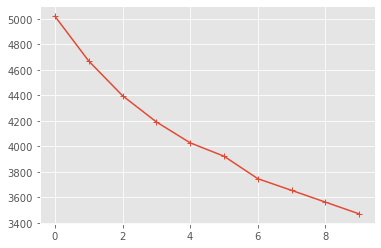

In [7]:
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
plt.plot(ssd, marker="+")

In [8]:
features = ['Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11',
       'Q12', 'Q32', 'Q33', 'Q13', 'Q14', 'Q16', 'Q17', 'Q18',
       'Q19', 'Q20', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26',
       'Q27', 'Q28', 'Q29', 'Q30']
# Making categorical variables into numeric representation

print(df.shape)
raw_data = df[features]
# Making categorical variables into numeric representation
new_raw_data = pd.get_dummies(raw_data, columns = features)

# Notes:
# We can also do this with Label Encoding and OneHotEncoder from the preprocessing library

print(new_raw_data.shape)
# print the shape

new_raw_data.head()

(363, 68)
(363, 347)


,Q6_-,Q6_18-24 years old,Q6_25-34 years old,Q6_35-44 years old,Q6_45-54 years old,Q6_55-64 years old,Q6_65-74 years old,Q6_75 years old or older,Q6_Prefer not to disclose,Q7_Associate degree,...,Q29_Always,Q29_Never,Q29_Often,Q29_Rarely,Q29_Sometimes,Q30_Always,Q30_Never,Q30_Often,Q30_Rarely,Q30_Sometimes
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss
from math import sqrt

from sklearn.cluster import KMeans, k_means
X_train = new_raw_data.values

# We wills start with 5 clusters

kmeans = KMeans(n_clusters=4, random_state=540)
kmeans = kmeans.fit(X_train)

# Prints the clusters it assigned to each observation
print("The clusters are: ", kmeans.labels_)

# Prints the Inertia
print("The Inertia is: ", kmeans.inertia_)

The clusters are:  [0 1 1 1 2 0 0 0 0 0 0 0 1 1 2 3 3 1 1 2 3 1 0 2 0 2 3 3 0 1 2 1 0 2 2 2 2
 1 1 2 0 1 3 2 2 1 1 0 2 1 3 2 2 2 2 1 2 3 3 1 3 1 0 1 2 2 3 1 0 2 3 0 2 1
 3 3 2 2 0 0 2 1 2 3 3 3 0 1 3 3 3 3 1 1 3 2 1 1 1 0 2 0 1 3 0 3 1 1 0 0 3
 3 0 3 3 3 1 1 1 3 2 1 1 1 1 1 3 2 3 3 0 3 1 3 2 1 1 0 0 3 1 0 1 3 3 0 0 3
 0 0 3 2 0 2 2 2 0 3 3 1 2 0 1 3 3 1 0 1 2 2 2 2 2 1 2 2 2 0 3 3 2 3 1 0 1
 3 2 1 2 1 0 0 3 2 2 3 3 0 1 1 3 3 3 2 3 0 2 1 1 2 0 3 0 0 2 1 2 2 1 2 3 3
 0 2 3 2 1 2 2 1 3 1 0 1 1 3 0 0 1 2 3 2 3 2 3 1 2 1 2 2 2 1 1 3 2 1 1 1 0
 0 0 2 1 3 1 1 0 0 3 1 2 3 2 1 0 1 3 2 3 2 1 1 1 1 1 1 3 1 2 0 2 2 0 0 2 3
 0 1 3 0 2 2 2 0 2 2 2 2 0 3 2 0 3 2 3 3 2 2 1 0 3 1 2 2 0 3 1 3 3 2 2 2 2
 0 1 3 1 2 2 3 1 3 0 2 0 2 2 0 0 1 0 3 0 3 0 1 0 1 2 2 0 0 2]
The Inertia is:  4868.51905817427


In [10]:
no_of_clusters = range(2,20) #[2,3,4,5,6,7,8,9]
inertia = []


for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=2)
    kmeans = kmeans.fit(X_train)
    u = kmeans.inertia_
    inertia.append(u)
    print("The innertia for :", f, "Clusters is:", u)

The innertia for : 2 Clusters is: 5098.917460317458
The innertia for : 3 Clusters is: 4962.953643457994
The innertia for : 4 Clusters is: 4873.446492185555
The innertia for : 5 Clusters is: 4792.853973487257
The innertia for : 6 Clusters is: 4716.744806759841
The innertia for : 7 Clusters is: 4665.70254352932
The innertia for : 8 Clusters is: 4593.068180552394
The innertia for : 9 Clusters is: 4571.597057851735
The innertia for : 10 Clusters is: 4525.741682391681
The innertia for : 11 Clusters is: 4483.455328633408
The innertia for : 12 Clusters is: 4443.934360991862
The innertia for : 13 Clusters is: 4405.0205898909835
The innertia for : 14 Clusters is: 4366.89275795889
The innertia for : 15 Clusters is: 4338.681815340186
The innertia for : 16 Clusters is: 4302.1387285337705
The innertia for : 17 Clusters is: 4274.866383442359
The innertia for : 18 Clusters is: 4246.3311533735505
The innertia for : 19 Clusters is: 4226.2477295424815


Text(0.5, 1.0, 'Inertia Plot per k')

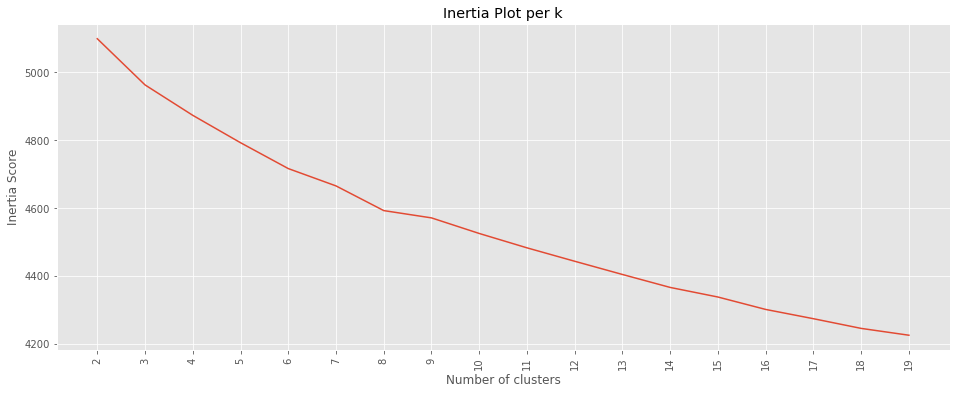

In [11]:
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation='vertical')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia Score')
plt.title("Inertia Plot per k")

In [12]:
kmeans = KMeans(n_clusters=4, random_state=2)
kmeans = kmeans.fit(X_train)


kmeans.labels_

# "predictions" for new data
predictions = kmeans.predict(X_train)

# calculating the Counts of the cluster
unique, counts = np.unique(predictions, return_counts=True)
counts = counts.reshape(1,4)

# Creating a datagrame
countscldf = pd.DataFrame(counts, columns = ["Cluster 0","Cluster 1","Cluster 2", "Cluster 3"])

# display
countscldf

,Cluster 0,Cluster 1,Cluster 2,Cluster 3
0,78,101,91,93


In [13]:
kmeans.labels_

array([0, 3, 3, 3, 0, 2, 2, 0, 2, 2, 0, 2, 3, 3, 0, 1, 2, 3, 3, 0, 1, 3,
       1, 0, 2, 0, 1, 1, 2, 3, 2, 3, 2, 0, 0, 0, 1, 3, 3, 0, 0, 3, 1, 2,
       0, 3, 1, 2, 2, 3, 1, 0, 2, 1, 0, 3, 0, 2, 1, 3, 1, 3, 2, 3, 0, 2,
       3, 1, 2, 1, 1, 2, 0, 3, 3, 1, 0, 1, 2, 2, 0, 3, 1, 1, 0, 1, 2, 3,
       1, 1, 1, 1, 3, 3, 1, 1, 3, 3, 3, 2, 2, 2, 3, 3, 2, 1, 1, 3, 0, 2,
       2, 1, 2, 1, 3, 0, 3, 1, 3, 1, 2, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1,
       3, 1, 2, 3, 3, 2, 2, 0, 3, 2, 3, 1, 2, 2, 2, 1, 2, 2, 1, 0, 2, 0,
       1, 1, 2, 1, 1, 3, 1, 2, 3, 1, 2, 3, 2, 3, 0, 0, 0, 2, 0, 3, 1, 0,
       1, 2, 1, 1, 0, 1, 3, 2, 3, 1, 0, 3, 2, 3, 1, 2, 1, 0, 1, 1, 1, 0,
       3, 3, 1, 1, 1, 0, 1, 0, 0, 3, 3, 0, 2, 1, 0, 0, 0, 3, 0, 0, 3, 2,
       1, 1, 2, 2, 1, 0, 1, 2, 0, 3, 1, 3, 2, 3, 3, 1, 0, 2, 3, 0, 1, 2,
       1, 2, 1, 1, 0, 3, 0, 2, 2, 3, 3, 1, 0, 3, 3, 3, 2, 2, 2, 1, 3, 1,
       3, 3, 0, 0, 2, 3, 1, 1, 2, 3, 2, 3, 1, 0, 1, 0, 3, 1, 3, 3, 3, 3,
       2, 3, 0, 2, 0, 0, 2, 2, 2, 1, 0, 3, 2, 1, 0,

In [14]:
predictions

array([0, 3, 3, 3, 0, 2, 2, 0, 2, 2, 0, 2, 3, 3, 0, 1, 2, 3, 3, 0, 1, 3,
       1, 0, 2, 0, 1, 1, 2, 3, 2, 3, 2, 0, 0, 0, 1, 3, 3, 0, 0, 3, 1, 2,
       0, 3, 1, 2, 2, 3, 1, 0, 2, 1, 0, 3, 0, 2, 1, 3, 1, 3, 2, 3, 0, 2,
       3, 1, 2, 1, 1, 2, 0, 3, 3, 1, 0, 1, 2, 2, 0, 3, 1, 1, 0, 1, 2, 3,
       1, 1, 1, 1, 3, 3, 1, 1, 3, 3, 3, 2, 2, 2, 3, 3, 2, 1, 1, 3, 0, 2,
       2, 1, 2, 1, 3, 0, 3, 1, 3, 1, 2, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1,
       3, 1, 2, 3, 3, 2, 2, 0, 3, 2, 3, 1, 2, 2, 2, 1, 2, 2, 1, 0, 2, 0,
       1, 1, 2, 1, 1, 3, 1, 2, 3, 1, 2, 3, 2, 3, 0, 0, 0, 2, 0, 3, 1, 0,
       1, 2, 1, 1, 0, 1, 3, 2, 3, 1, 0, 3, 2, 3, 1, 2, 1, 0, 1, 1, 1, 0,
       3, 3, 1, 1, 1, 0, 1, 0, 0, 3, 3, 0, 2, 1, 0, 0, 0, 3, 0, 0, 3, 2,
       1, 1, 2, 2, 1, 0, 1, 2, 0, 3, 1, 3, 2, 3, 3, 1, 0, 2, 3, 0, 1, 2,
       1, 2, 1, 1, 0, 3, 0, 2, 2, 3, 3, 1, 0, 3, 3, 3, 2, 2, 2, 1, 3, 1,
       3, 3, 0, 0, 2, 3, 1, 1, 2, 3, 2, 3, 1, 0, 1, 0, 3, 1, 3, 3, 3, 3,
       2, 3, 0, 2, 0, 0, 2, 2, 2, 1, 0, 3, 2, 1, 0,

Explained variance ratio (first two components): [0.08678811 0.04373199]


<Figure size 432x288 with 0 Axes>

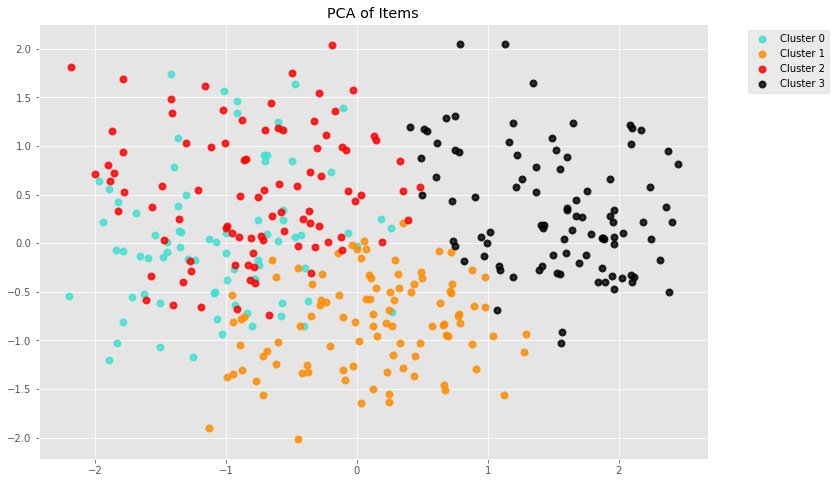

In [17]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X = X_train
y_num = predictions

target_names = ["Cluster 0","Cluster 1","Cluster 2", "Cluster 3"]

pca = PCA(n_components=2, random_state = 500)
X_r = pca.fit(X).transform(X)


# Percentage of variance explained for each components
print('Explained variance ratio (first two components): %s' % str(pca.explained_variance_ratio_))

# Plotting the data
plt.figure()
plt.figure(figsize=(12,8))
colors = ['turquoise', 'darkorange', 'red', 'black']
lw = 2


for color, i, target_name in zip(colors, [0, 1, 2, 3], target_names):
    plt.scatter(X_r[y_num == i, 0], X_r[y_num == i, 1], color=color, alpha=.8, lw=lw,label=target_name)
    
plt.legend(loc='best', shadow=False, scatterpoints=3)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.6)   
plt.title('PCA of Items')
plt.show()

kmeans = KMeans(n_clusters=4)
kmeans.fit(df_scaled)
labels = kmeans.labels_

clusters=pd.concat([new_df, pd.DataFrame({'cluster':labels})], axis=1)
clusters.head()
clusters.to_excel('file2.xlsx')

Total Variance in our dataset is:  15.028370089645797
The 95% variance we want to have is:  14.276951585163507

Variance explain with 41 n_compononets:  12.029530105299745
Variance explain with 50 n_compononets:  12.912885887422185
Variance explain with 53 n_compononets:  13.143763693819734
Variance explain with 55 n_compononets:  13.28408311849113
Variance explain with 60 n_compononets:  13.582289837247945
Variance explain with 65 n_compononets:  13.827710522565901
Variance explain with 70 n_compononets:  14.023714610808442
Variance explain with 73 n_compononets:  14.11981324130827
Variance explain with 78 n_compononets:  14.255818846449756
Variance explain with 80 n_compononets:  14.301274151812096
Variance explain with 83 n_compononets:  14.36199582571373


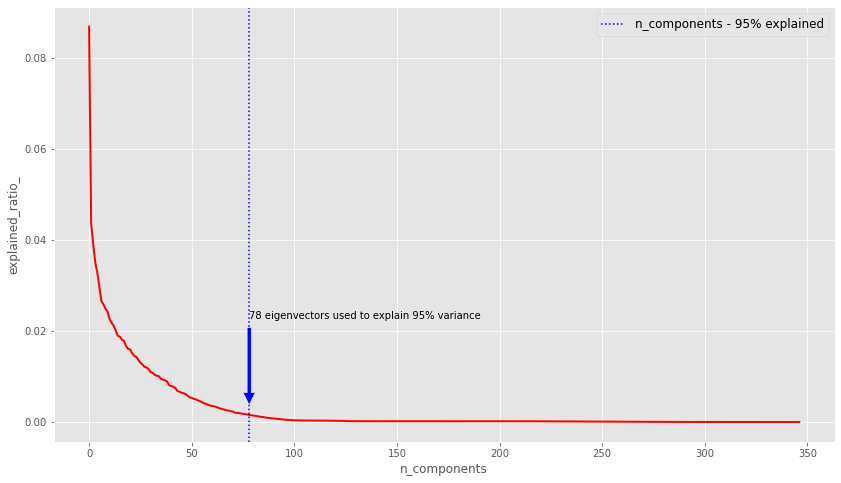

In [16]:
# Trying with Dimentionality reduction and then Kmeans

n_components = X.shape[1]

# Running PCA with all components
pca = PCA(n_components=n_components, random_state = 453)
X_r = pca.fit(X).transform(X)


# Calculating the 95% Variance
total_variance = sum(pca.explained_variance_)
print("Total Variance in our dataset is: ", total_variance)
var_95 = total_variance * 0.95
print("The 95% variance we want to have is: ", var_95)
print("")

# Creating a df with the components and explained variance
a = zip(range(0,n_components), pca.explained_variance_)
a = pd.DataFrame(a, columns=["PCA Comp", "Explained Variance"])

# Trying to hit 95%
print("Variance explain with 41 n_compononets: ", sum(a["Explained Variance"][0:41]))
print("Variance explain with 50 n_compononets: ", sum(a["Explained Variance"][0:50]))
print("Variance explain with 53 n_compononets: ", sum(a["Explained Variance"][0:53]))
print("Variance explain with 55 n_compononets: ", sum(a["Explained Variance"][0:55]))
print("Variance explain with 60 n_compononets: ", sum(a["Explained Variance"][0:60]))
print("Variance explain with 65 n_compononets: ", sum(a["Explained Variance"][0:65]))
print("Variance explain with 70 n_compononets: ", sum(a["Explained Variance"][0:70]))
print("Variance explain with 73 n_compononets: ", sum(a["Explained Variance"][0:73]))
print("Variance explain with 78 n_compononets: ", sum(a["Explained Variance"][0:78]))
print("Variance explain with 80 n_compononets: ", sum(a["Explained Variance"][0:80]))
print("Variance explain with 83 n_compononets: ", sum(a["Explained Variance"][0:83]))


# Plotting the Data
plt.figure(1, figsize=(14, 8))
plt.plot(pca.explained_variance_ratio_, linewidth=2, c="r")
plt.xlabel('n_components')
plt.ylabel('explained_ratio_')

# Plotting line with 95% e.v.
plt.axvline(78,linestyle=':', label='n_components - 95% explained', c ="blue")
plt.legend(prop=dict(size=12))

# adding arrow
plt.annotate('78 eigenvectors used to explain 95% variance', xy=(78, pca.explained_variance_ratio_[65]), 
             xytext=(78, pca.explained_variance_ratio_[10]),
            arrowprops=dict(facecolor='blue', shrink=0.05))

plt.show()

The innertia for : 2 Clusters is: 4819.435947275391
The innertia for : 3 Clusters is: 4683.731295740391
The innertia for : 4 Clusters is: 4577.5452781774975
The innertia for : 5 Clusters is: 4507.217132882805
The innertia for : 6 Clusters is: 4435.701696227295
The innertia for : 7 Clusters is: 4383.415721702537
The innertia for : 8 Clusters is: 4338.9492658830095
The innertia for : 9 Clusters is: 4294.691566885079
The innertia for : 10 Clusters is: 4259.37985023904
The innertia for : 11 Clusters is: 4206.302295571613
The innertia for : 12 Clusters is: 4158.780508897073
The innertia for : 13 Clusters is: 4136.101319695189
The innertia for : 14 Clusters is: 4094.022466438439
The innertia for : 15 Clusters is: 4077.927794889887
The innertia for : 16 Clusters is: 4046.3291360030134
The innertia for : 17 Clusters is: 4015.704223826325
The innertia for : 18 Clusters is: 3990.1697606826274
The innertia for : 19 Clusters is: 3972.164672378908


Text(0.5, 1.0, 'Inertia Plot per k')

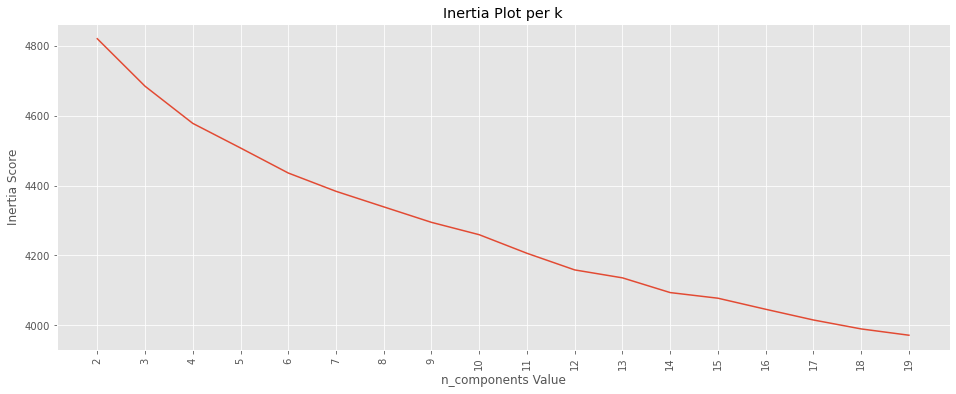

In [17]:
pca = PCA(n_components=78, random_state = 453)
X_r = pca.fit(X).transform(X)

inertia = []

#running Kmeans

for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=2)
    kmeans = kmeans.fit(X_r)
    u = kmeans.inertia_
    inertia.append(u)
    print("The innertia for :", f, "Clusters is:", u)

# Creating the scree plot for Intertia - elbow method
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation='vertical')
plt.xlabel('n_components Value')
plt.ylabel('Inertia Score')
plt.title("Inertia Plot per k")

In [18]:
new_features = ['Q11_0-1 years', 
'Q11_2-3 years', 
'Q11_Choose not to mention',
'Q11_More than 3 years',
'Q12_Comfortable', 
'Q12_Extremely comfortable',
'Q12_Not comfortable',
'Q12_Somewhat comfortable',
'Q12_Very comfortable',
'Q13_Always',
'Q13_Never',
'Q13_Often',
'Q13_Rarely',
'Q13_Sometimes',
'Q14_Always',
'Q14_Never',
'Q14_Often',
'Q14_Rarely',
'Q14_Sometimes',
'Q16_Always',
'Q16_Never',
'Q16_Often',
'Q16_Rarely',
'Q16_Sometimes',
'Q17_Always',
'Q17_Never',
'Q17_Often',
'Q17_Rarely',
'Q17_Sometimes',
'Q18_Always',
'Q18_Never',
'Q18_Often',
'Q18_Rarely',
'Q18_Sometimes',
'Q19_Always',
'Q19_Never',
'Q19_Often',
'Q19_Rarely',
'Q19_Sometimes',
'Q20_Always',
'Q20_Never',
'Q20_Often',
'Q20_Rarely',
'Q20_Sometimes',
'Q22_Always',
'Q22_Never',
'Q22_Often',
'Q22_Rarely',
'Q22_Sometimes',
'Q23_Always',
'Q23_Never',
'Q23_Often',
'Q23_Rarely',
'Q23_Sometimes',
'Q24_Always',
'Q24_Never',
'Q24_Often',
'Q24_Rarely',
'Q24_Sometimes',
'Q25_Always',
'Q25_Never',
'Q25_Often',
'Q25_Rarely',
'Q25_Sometimes',
'Q26_Always',
'Q26_Never',
'Q26_Often',
'Q26_Rarely',
'Q26_Sometimes',
'Q27_Always',
'Q27_Never',
'Q27_Often',
'Q27_Rarely',
'Q27_Sometimes',
'Q28_Always',
'Q28_Never',
'Q28_Often',
'Q28_Rarely',
'Q28_Sometimes',
'Q29_Always',
'Q29_Never',
'Q29_Often',
'Q29_Rarely',
'Q29_Sometimes',
'Q30_Always',
'Q30_Never',
'Q30_Often',
'Q30_Rarely',
'Q30_Sometimes' ]

The innertia for : 2 Clusters is: 3671.3862433862428
The innertia for : 3 Clusters is: 3549.815950407576
The innertia for : 4 Clusters is: 3467.9275634092164
The innertia for : 5 Clusters is: 3395.8808568350973
The innertia for : 6 Clusters is: 3343.8806900257496
The innertia for : 7 Clusters is: 3291.688730248071
The innertia for : 8 Clusters is: 3257.968494144732
The innertia for : 9 Clusters is: 3214.7684756976073
The innertia for : 10 Clusters is: 3192.3543076985957
The innertia for : 11 Clusters is: 3145.400341587911
The innertia for : 12 Clusters is: 3124.2071425872905
The innertia for : 13 Clusters is: 3083.740905488718
The innertia for : 14 Clusters is: 3031.1063093805296
The innertia for : 15 Clusters is: 3000.8359774468267
The innertia for : 16 Clusters is: 3005.7298425931826
The innertia for : 17 Clusters is: 2985.3230601689343
The innertia for : 18 Clusters is: 2944.8062495437994
The innertia for : 19 Clusters is: 2925.191161197346
The innertia for : 20 Clusters is: 2914.66

Text(0.5, 1.0, 'Inertia Plot per k')

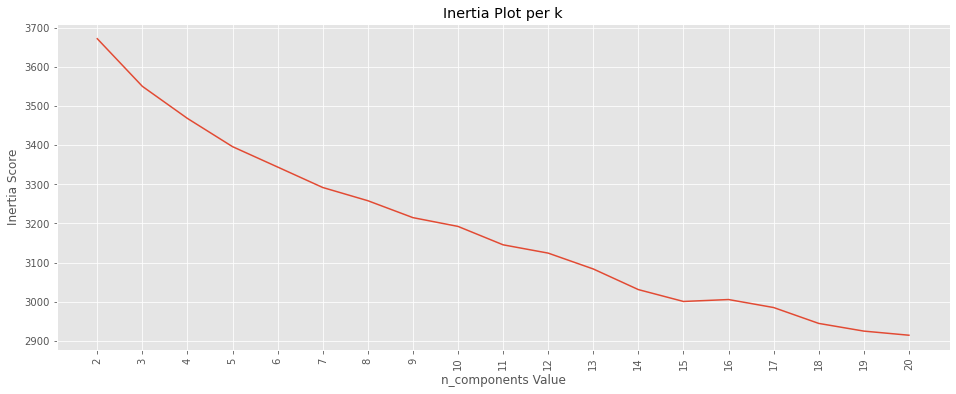

In [19]:
X_train = new_raw_data[new_features].values

# Running K means with multible Ks

no_of_clusters = range(2,21) #[2,3,4,5,6,7,8,9]
inertia = []


for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=2)
    kmeans = kmeans.fit(X_train)
    u = kmeans.inertia_
    inertia.append(u)
    print("The innertia for :", f, "Clusters is:", u)

    
# Creating the scree plot for Intertia - elbow method
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation='vertical')
plt.xlabel('n_components Value')
plt.ylabel('Inertia Score')
plt.title("Inertia Plot per k")

Explained variance ratio (first two components): [0.11652559 0.04785458]


<Figure size 432x288 with 0 Axes>

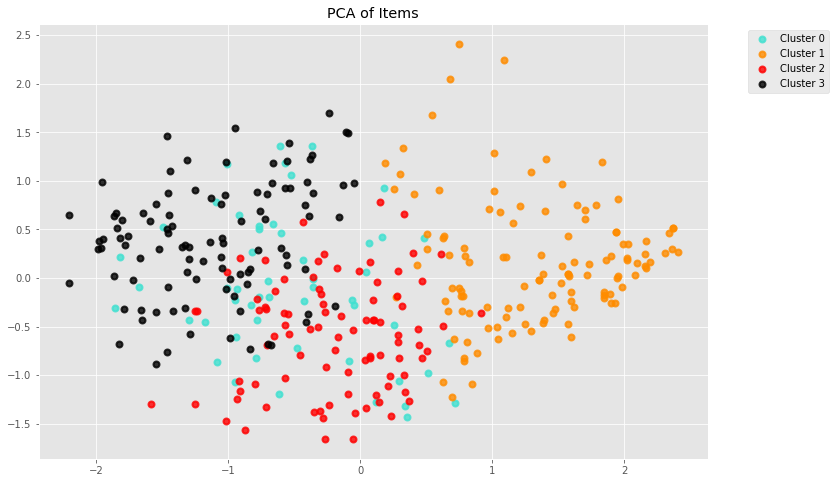

In [20]:
# Running K means on 4 clusters

kmeans = KMeans(n_clusters=4, random_state=2)
kmeans = kmeans.fit(X_train)

predictions = kmeans.predict(X_train)

# Running PCA to Visualize the data

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X = X_train
y_num = predictions

target_names = ["Cluster 0","Cluster 1","Cluster 2", "Cluster 3"]

pca = PCA(n_components=2, random_state = 453)
X_r = pca.fit(X).transform(X)


# Percentage of variance explained for each components
print('Explained variance ratio (first two components): %s' % str(pca.explained_variance_ratio_))

# Plotting the data
plt.figure()
plt.figure(figsize=(12,8))
colors = ['turquoise', 'darkorange', 'red', 'black']
lw = 2


for color, i, target_name in zip(colors, [0, 1, 2, 3], target_names):
    plt.scatter(X_r[y_num == i, 0], X_r[y_num == i, 1], color=color, alpha=.8, lw=lw,label=target_name)
    
plt.legend(loc='best', shadow=False, scatterpoints=3)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.6)   
plt.title('PCA of Items')
plt.show()

Total Variance in our dataset is:  11.07157968433709
The 95% variance we want to have is:  10.518000700120234

Variance explain with 30 n_compononets:  8.951485478105905
Variance explain with 35 n_compononets:  9.553372217033354
Variance explain with 36 n_compononets:  9.656142063153009
Variance explain with 40 n_compononets:  10.011398769317324
Variance explain with 47 n_compononets:  10.486041774853046
Variance explain with 50 n_compononets:  10.631187144235737


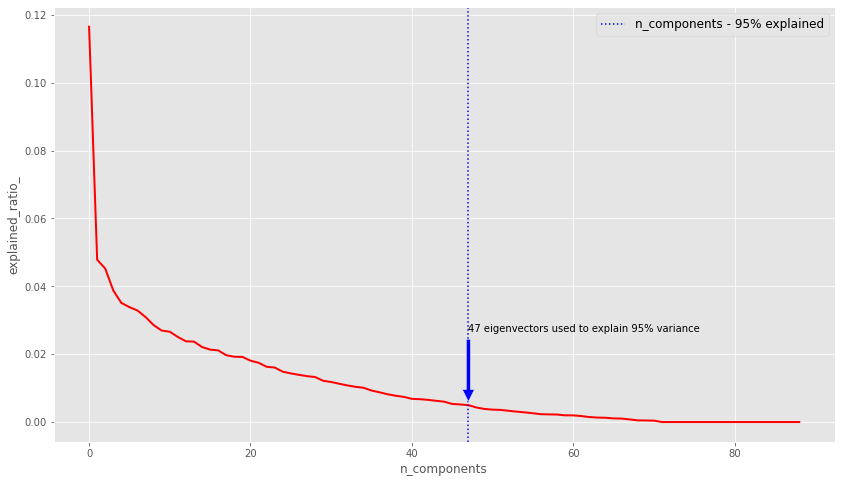

In [21]:
#Trying with Dimentionality reduction and then Kmeans

n_components = X.shape[1]

# Running PCA with all components
pca = PCA(n_components=n_components, random_state = 453)
X_r = pca.fit(X).transform(X)


# Calculating the 95% Variance
total_variance = sum(pca.explained_variance_)
print("Total Variance in our dataset is: ", total_variance)
var_95 = total_variance * 0.95
print("The 95% variance we want to have is: ", var_95)
print("")

# Creating a df with the components and explained variance
a = zip(range(0,n_components), pca.explained_variance_)
a = pd.DataFrame(a, columns=["PCA Comp", "Explained Variance"])

# Trying to hit 95%
print("Variance explain with 30 n_compononets: ", sum(a["Explained Variance"][0:30]))
print("Variance explain with 35 n_compononets: ", sum(a["Explained Variance"][0:35]))
print("Variance explain with 36 n_compononets: ", sum(a["Explained Variance"][0:36]))
print("Variance explain with 40 n_compononets: ", sum(a["Explained Variance"][0:40]))
print("Variance explain with 47 n_compononets: ", sum(a["Explained Variance"][0:47]))
print("Variance explain with 50 n_compononets: ", sum(a["Explained Variance"][0:50]))

# Plotting the Data
plt.figure(1, figsize=(14, 8))
plt.plot(pca.explained_variance_ratio_, linewidth=2, c="r")
plt.xlabel('n_components')
plt.ylabel('explained_ratio_')

# Plotting line with 95% e.v.
plt.axvline(47,linestyle=':', label='n_components - 95% explained', c ="blue")
plt.legend(prop=dict(size=12))

# adding arrow
plt.annotate('47 eigenvectors used to explain 95% variance', xy=(47, pca.explained_variance_ratio_[47]), xytext=(47, pca.explained_variance_ratio_[10]),
            arrowprops=dict(facecolor='blue', shrink=0.05))

plt.show()

The innertia for : 2 Clusters is: 3459.276718668104
The innertia for : 3 Clusters is: 3337.120779770268
The innertia for : 4 Clusters is: 3258.582540873664
The innertia for : 5 Clusters is: 3186.7358709503155
The innertia for : 6 Clusters is: 3136.3817991238716
The innertia for : 7 Clusters is: 3074.4469639932026
The innertia for : 8 Clusters is: 3048.6682838488923
The innertia for : 9 Clusters is: 2994.2849801944385
The innertia for : 10 Clusters is: 2969.178051402891
The innertia for : 11 Clusters is: 2926.7841890443915
The innertia for : 12 Clusters is: 2896.8325042766337
The innertia for : 13 Clusters is: 2864.4616880407575
The innertia for : 14 Clusters is: 2840.6636564422893
The innertia for : 15 Clusters is: 2799.9249841800915
The innertia for : 16 Clusters is: 2776.599266197058
The innertia for : 17 Clusters is: 2751.8526883993354
The innertia for : 18 Clusters is: 2741.2854382282894
The innertia for : 19 Clusters is: 2713.2587276058166
The innertia for : 20 Clusters is: 2695.6

Text(0.5, 1.0, 'Inertia Plot per k')

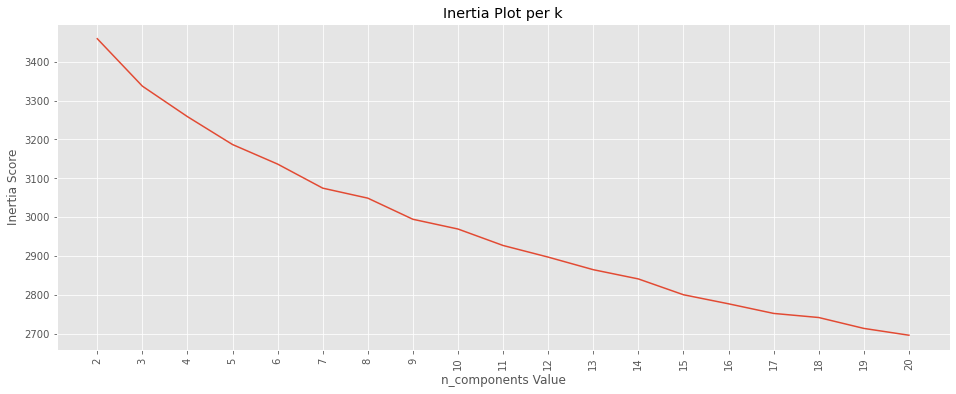

In [22]:
# Running PCA again

pca = PCA(n_components=47, random_state = 453)
X_r = pca.fit(X).transform(X)

inertia = []

#running Kmeans

for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=2)
    kmeans = kmeans.fit(X_r)
    u = kmeans.inertia_
    inertia.append(u)
    print("The innertia for :", f, "Clusters is:", u)

# Creating the scree plot for Intertia - elbow method
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation='vertical')
plt.xlabel('n_components Value')
plt.ylabel('Inertia Score')
plt.title("Inertia Plot per k")

In [23]:
pca = PCA(n_components=47, random_state = 453)
X_r = pca.fit(X).transform(X)

# Running Kmeans with 5 Ks
kmeans = KMeans(n_clusters=5, random_state=2)
kmeans = kmeans.fit(X_r)

clusters = kmeans.labels_

# Attachine the clusters back to our initial Dataset that has all the data
df['Clusters'] = clusters

# Creating a cluster Category
df['Clusters Category'] = 'No Data'
df['Clusters Category'].loc[df['Clusters'] == 0] = 'Cluster 1'
df['Clusters Category'].loc[df['Clusters'] == 1] = 'Cluster 2'
df['Clusters Category'].loc[df['Clusters'] == 2] = 'Cluster 3'
df['Clusters Category'].loc[df['Clusters'] == 3] = 'Cluster 4'
df['Clusters Category'].loc[df['Clusters'] == 4] = 'Cluster 5'

df.head(10)

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,Q27,Q27 CODE,Q28,Q28 CODE,Q29,Q29 CODE,Q30,Q30 CODE,Clusters,Clusters Category
0,2020-03-04 16:15:00,2020-03-04 16:18:00,IP Address,50.234.115.104,100,131,True,2020-03-04 16:18:00,R_31QoBjUuzHTbsqV,NaN,...,Rarely,2,Rarely,2,Rarely,2,Never,1,1,Cluster 2
1,2020-03-05 09:49:00,2020-03-05 09:53:00,IP Address,50.234.115.107,100,230,True,2020-03-05 09:53:00,R_3fDBwxZZ5UjWkTL,NaN,...,Never,1,Rarely,2,Often,4,Always,5,4,Cluster 5
2,2020-03-06 11:30:00,2020-03-06 11:36:00,IP Address,71.206.59.235,100,307,True,2020-03-06 11:36:00,R_5ABgkao9Yd6RPgJ,NaN,...,Never,1,Never,1,Often,4,Always,5,4,Cluster 5
3,2020-03-08 17:21:00,2020-03-08 17:30:00,IP Address,151.196.6.96,100,531,True,2020-03-08 17:30:00,R_24BMNg1do0RN8bg,NaN,...,Never,1,Always,5,Always,5,Always,5,4,Cluster 5
4,2020-03-09 14:08:00,2020-03-09 14:14:00,IP Address,71.246.77.198,100,308,True,2020-03-09 14:14:00,R_2Rb1C4nCg2FE9ge,NaN,...,Rarely,2,Often,4,Always,5,Often,4,1,Cluster 2
5,2020-03-09 14:23:00,2020-03-09 14:25:00,IP Address,99.203.81.174,100,148,True,2020-03-09 14:25:00,R_3m2gXsOuPDgDmt4,NaN,...,Rarely,2,Sometimes,3,Sometimes,3,Often,4,1,Cluster 2
6,2020-03-09 14:25:00,2020-03-09 14:28:00,IP Address,74.96.243.211,100,181,True,2020-03-09 14:28:00,R_1IXe4wMKRTdAlpj,NaN,...,Rarely,2,Sometimes,3,Sometimes,3,Sometimes,3,1,Cluster 2
7,2020-03-09 14:27:00,2020-03-09 14:29:00,IP Address,134.192.250.51,100,124,True,2020-03-09 14:29:00,R_22rF5tAWkni82gG,NaN,...,Rarely,2,Never,1,Sometimes,3,Never,1,1,Cluster 2
8,2020-03-09 14:26:00,2020-03-09 14:29:00,IP Address,167.102.240.195,100,198,True,2020-03-09 14:29:00,R_215mrqhvFLOls5c,NaN,...,Never,1,Rarely,2,Often,4,Often,4,2,Cluster 3
9,2020-03-09 14:27:00,2020-03-09 14:31:00,IP Address,174.196.142.218,100,251,True,2020-03-09 14:31:00,R_3ix5kgNyTujuR52,NaN,...,Never,1,Always,5,Always,5,Always,5,0,Cluster 1


In [24]:
new_features = [
'Q13_Always',
'Q13_Never',
'Q13_Often',
'Q13_Rarely',
'Q13_Sometimes',
'Q14_Always',
'Q14_Never',
'Q14_Often',
'Q14_Rarely',
'Q14_Sometimes',
'Q16_Always',
'Q16_Never',
'Q16_Often',
'Q16_Rarely',
'Q16_Sometimes',
'Q17_Always',
'Q17_Never',
'Q17_Often',
'Q17_Rarely',
'Q17_Sometimes',
'Q18_Always',
'Q18_Never',
'Q18_Often',
'Q18_Rarely',
'Q18_Sometimes',
'Q19_Always',
'Q19_Never',
'Q19_Often',
'Q19_Rarely',
'Q19_Sometimes',
'Q20_Always',
'Q20_Never',
'Q20_Often',
'Q20_Rarely',
'Q20_Sometimes',
'Q22_Always',
'Q22_Never',
'Q22_Often',
'Q22_Rarely',
'Q22_Sometimes',
'Q23_Always',
'Q23_Never',
'Q23_Often',
'Q23_Rarely',
'Q23_Sometimes',
'Q24_Always',
'Q24_Never',
'Q24_Often',
'Q24_Rarely',
'Q24_Sometimes',
'Q25_Always',
'Q25_Never',
'Q25_Often',
'Q25_Rarely',
'Q25_Sometimes',
'Q26_Always',
'Q26_Never',
'Q26_Often',
'Q26_Rarely',
'Q26_Sometimes',
'Q27_Always',
'Q27_Never',
'Q27_Often',
'Q27_Rarely',
'Q27_Sometimes',
'Q28_Always',
'Q28_Never',
'Q28_Often',
'Q28_Rarely',
'Q28_Sometimes',
'Q29_Always',
'Q29_Never',
'Q29_Often',
'Q29_Rarely',
'Q29_Sometimes',
'Q30_Always',
'Q30_Never',
'Q30_Often',
'Q30_Rarely',
'Q30_Sometimes']

The innertia for : 2 Clusters is: 3191.9009286021787
The innertia for : 3 Clusters is: 3076.4594642403563
The innertia for : 4 Clusters is: 2997.5417258892917
The innertia for : 5 Clusters is: 2930.610232232015
The innertia for : 6 Clusters is: 2883.2906870127526
The innertia for : 7 Clusters is: 2829.7909937201725
The innertia for : 8 Clusters is: 2784.572383174951
The innertia for : 9 Clusters is: 2738.0854150653554
The innertia for : 10 Clusters is: 2711.1957172063658
The innertia for : 11 Clusters is: 2676.7475206300787
The innertia for : 12 Clusters is: 2645.5706268427357
The innertia for : 13 Clusters is: 2633.2563262901967
The innertia for : 14 Clusters is: 2596.639106306863
The innertia for : 15 Clusters is: 2566.097195019701
The innertia for : 16 Clusters is: 2551.392260758564
The innertia for : 17 Clusters is: 2531.2662541966893
The innertia for : 18 Clusters is: 2518.227064408448
The innertia for : 19 Clusters is: 2490.325450339135
The innertia for : 20 Clusters is: 2474.581

Text(0.5, 1.0, 'Inertia Plot per k')

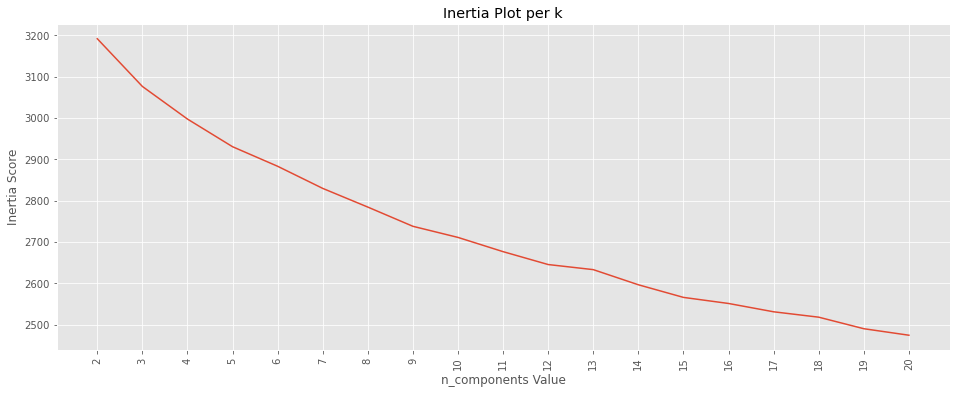

In [25]:
X_train = new_raw_data[new_features].values

# Running K means with multible Ks

no_of_clusters = range(2,21) #[2,3,4,5,6,7,8,9]
inertia = []


for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=2)
    kmeans = kmeans.fit(X_train)
    u = kmeans.inertia_
    inertia.append(u)
    print("The innertia for :", f, "Clusters is:", u)

    
# Creating the scree plot for Intertia - elbow method
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation='vertical')
plt.xlabel('n_components Value')
plt.ylabel('Inertia Score')
plt.title("Inertia Plot per k")

Explained variance ratio (first two components): [0.12942708 0.05318591]


<Figure size 432x288 with 0 Axes>

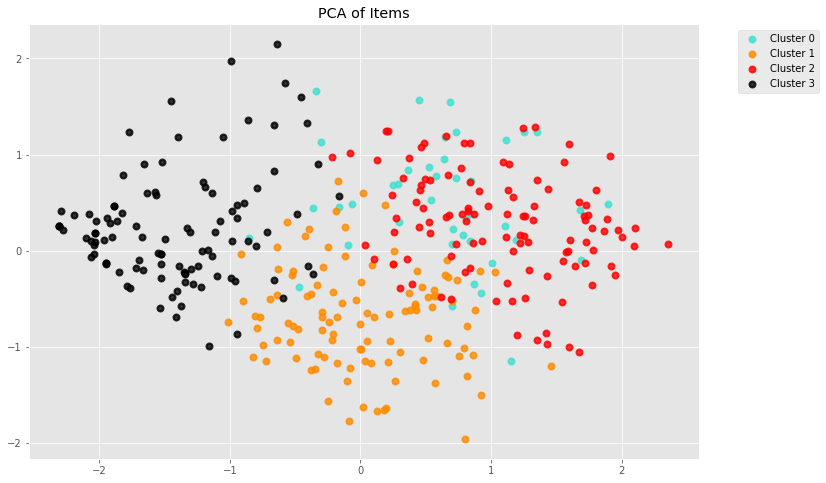

In [26]:
# Running K means on 5 clusters

kmeans = KMeans(n_clusters=4, random_state=2)
kmeans = kmeans.fit(X_train)

predictions = kmeans.predict(X_train)

# Running PCA to Visualize the data

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X = X_train
y_num = predictions

target_names = ["Cluster 0","Cluster 1","Cluster 2", "Cluster 3"]

pca = PCA(n_components=2, random_state = 453)
X_r = pca.fit(X).transform(X)


# Percentage of variance explained for each components
print('Explained variance ratio (first two components): %s' % str(pca.explained_variance_ratio_))

# Plotting the data
plt.figure()
plt.figure(figsize=(12,8))
colors = ['turquoise', 'darkorange', 'red', 'black']
lw = 2


for color, i, target_name in zip(colors, [0, 1, 2, 3], target_names):
    plt.scatter(X_r[y_num == i, 0], X_r[y_num == i, 1], color=color, alpha=.8, lw=lw,label=target_name)
    
plt.legend(loc='best', shadow=False, scatterpoints=3)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.6)   
plt.title('PCA of Items')
plt.show()

Total Variance in our dataset is:  9.729814468136926
The 95% variance we want to have is:  9.243323744730079

Variance explain with 30 n_compononets:  8.2131598413806
Variance explain with 35 n_compononets:  8.685072724462216
Variance explain with 36 n_compononets:  8.764814224085319
Variance explain with 40 n_compononets:  9.052864174868095
Variance explain with 43 n_compononets:  9.228619398289615
Variance explain with 50 n_compononets:  9.496479641651483


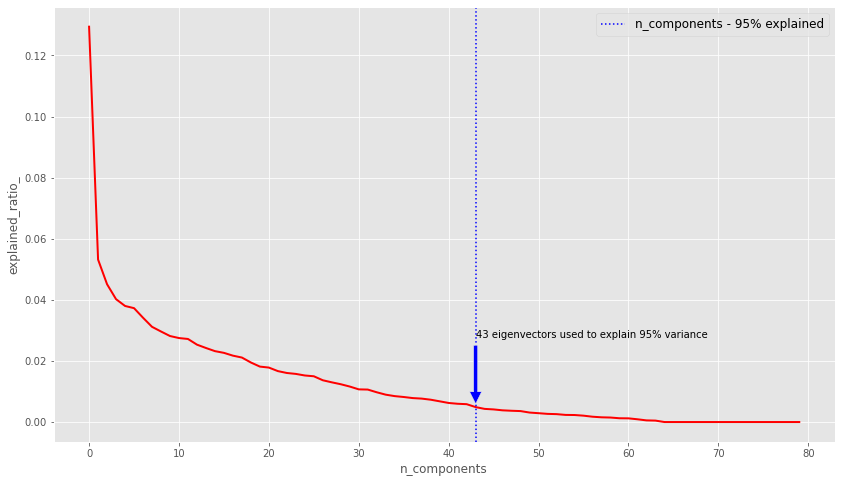

In [27]:
#Trying with Dimentionality reduction and then Kmeans

n_components = X.shape[1]

# Running PCA with all components
pca = PCA(n_components=n_components, random_state = 453)
X_r = pca.fit(X).transform(X)


# Calculating the 95% Variance
total_variance = sum(pca.explained_variance_)
print("Total Variance in our dataset is: ", total_variance)
var_95 = total_variance * 0.95
print("The 95% variance we want to have is: ", var_95)
print("")

# Creating a df with the components and explained variance
a = zip(range(0,n_components), pca.explained_variance_)
a = pd.DataFrame(a, columns=["PCA Comp", "Explained Variance"])

# Trying to hit 95%
print("Variance explain with 30 n_compononets: ", sum(a["Explained Variance"][0:30]))
print("Variance explain with 35 n_compononets: ", sum(a["Explained Variance"][0:35]))
print("Variance explain with 36 n_compononets: ", sum(a["Explained Variance"][0:36]))
print("Variance explain with 40 n_compononets: ", sum(a["Explained Variance"][0:40]))
print("Variance explain with 43 n_compononets: ", sum(a["Explained Variance"][0:43]))
print("Variance explain with 50 n_compononets: ", sum(a["Explained Variance"][0:50]))

# Plotting the Data
plt.figure(1, figsize=(14, 8))
plt.plot(pca.explained_variance_ratio_, linewidth=2, c="r")
plt.xlabel('n_components')
plt.ylabel('explained_ratio_')

# Plotting line with 95% e.v.
plt.axvline(43,linestyle=':', label='n_components - 95% explained', c ="blue")
plt.legend(prop=dict(size=12))

# adding arrow
plt.annotate('43 eigenvectors used to explain 95% variance', xy=(43, pca.explained_variance_ratio_[43]), xytext=(43, pca.explained_variance_ratio_[10]),
            arrowprops=dict(facecolor='blue', shrink=0.05))

plt.show()

The innertia for : 2 Clusters is: 3010.5419031175315
The innertia for : 3 Clusters is: 2892.2782080416837
The innertia for : 4 Clusters is: 2816.949327809019
The innertia for : 5 Clusters is: 2757.526909325681
The innertia for : 6 Clusters is: 2686.90153526102
The innertia for : 7 Clusters is: 2649.572737951014
The innertia for : 8 Clusters is: 2591.1356382767995
The innertia for : 9 Clusters is: 2572.7622278592944
The innertia for : 10 Clusters is: 2536.5910396308764
The innertia for : 11 Clusters is: 2484.4601556979414
The innertia for : 12 Clusters is: 2455.378922318182
The innertia for : 13 Clusters is: 2414.91597186142
The innertia for : 14 Clusters is: 2399.8208155518228
The innertia for : 15 Clusters is: 2375.794596137733
The innertia for : 16 Clusters is: 2347.8080102623667
The innertia for : 17 Clusters is: 2337.571895941895
The innertia for : 18 Clusters is: 2312.6951964984187
The innertia for : 19 Clusters is: 2292.572356369371
The innertia for : 20 Clusters is: 2278.4162305

Text(0.5, 1.0, 'Inertia Plot per k')

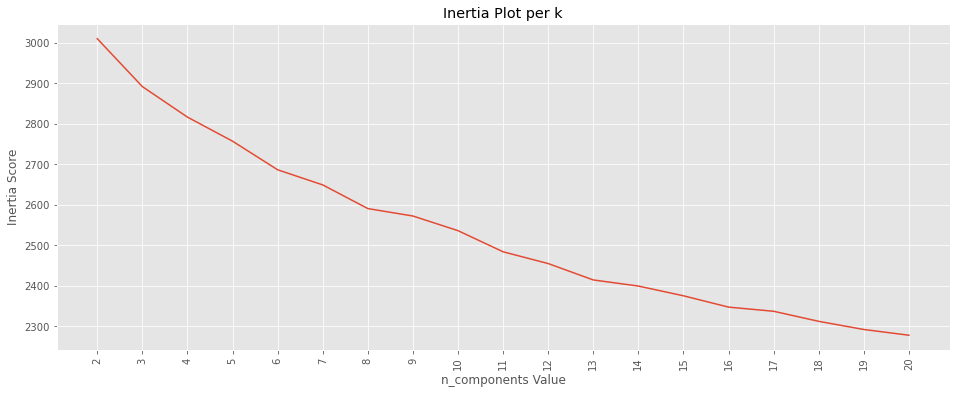

In [28]:
# Running PCA again

pca = PCA(n_components=43, random_state = 453)
X_r = pca.fit(X).transform(X)

inertia = []

#running Kmeans

for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=2)
    kmeans = kmeans.fit(X_r)
    u = kmeans.inertia_
    inertia.append(u)
    print("The innertia for :", f, "Clusters is:", u)

# Creating the scree plot for Intertia - elbow method
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation='vertical')
plt.xlabel('n_components Value')
plt.ylabel('Inertia Score')
plt.title("Inertia Plot per k")

In [29]:
new_features = [
'Q18_Always',
'Q18_Never',
'Q18_Often',
'Q18_Rarely',
'Q18_Sometimes',
'Q19_Always',
'Q19_Never',
'Q19_Often',
'Q19_Rarely',
'Q19_Sometimes',
'Q20_Always',
'Q20_Never',
'Q20_Often',
'Q20_Rarely',
'Q20_Sometimes',
'Q22_Always',
'Q22_Never',
'Q22_Often',
'Q22_Rarely',
'Q22_Sometimes',
'Q23_Always',
'Q23_Never',
'Q23_Often',
'Q23_Rarely',
'Q23_Sometimes',
'Q24_Always',
'Q24_Never',
'Q24_Often',
'Q24_Rarely',
'Q24_Sometimes',
'Q25_Always',
'Q25_Never',
'Q25_Often',
'Q25_Rarely',
'Q25_Sometimes',
'Q26_Always',
'Q26_Never',
'Q26_Often',
'Q26_Rarely',
'Q26_Sometimes',
'Q27_Always',
'Q27_Never',
'Q27_Often',
'Q27_Rarely',
'Q27_Sometimes',
'Q28_Always',
'Q28_Never',
'Q28_Often',
'Q28_Rarely',
'Q28_Sometimes',
'Q29_Always',
'Q29_Never',
'Q29_Often',
'Q29_Rarely',
'Q29_Sometimes',
'Q30_Always',
'Q30_Never',
'Q30_Often',
'Q30_Rarely',
'Q30_Sometimes']

The innertia for : 2 Clusters is: 2549.168903940889
The innertia for : 3 Clusters is: 2434.1492676190965
The innertia for : 4 Clusters is: 2361.611773826935
The innertia for : 5 Clusters is: 2294.7175080227807
The innertia for : 6 Clusters is: 2244.011397678993
The innertia for : 7 Clusters is: 2193.1291892028485
The innertia for : 8 Clusters is: 2160.168296789332
The innertia for : 9 Clusters is: 2130.9688112490253
The innertia for : 10 Clusters is: 2091.3263720948294
The innertia for : 11 Clusters is: 2070.4060472095966
The innertia for : 12 Clusters is: 2051.396233659638
The innertia for : 13 Clusters is: 2021.590446710358
The innertia for : 14 Clusters is: 2003.4914568683453
The innertia for : 15 Clusters is: 1982.3062392881727
The innertia for : 16 Clusters is: 1950.2861910826643
The innertia for : 17 Clusters is: 1927.9905615833145
The innertia for : 18 Clusters is: 1896.8401021360053
The innertia for : 19 Clusters is: 1881.6594586495987
The innertia for : 20 Clusters is: 1862.02

Text(0.5, 1.0, 'Inertia Plot per k')

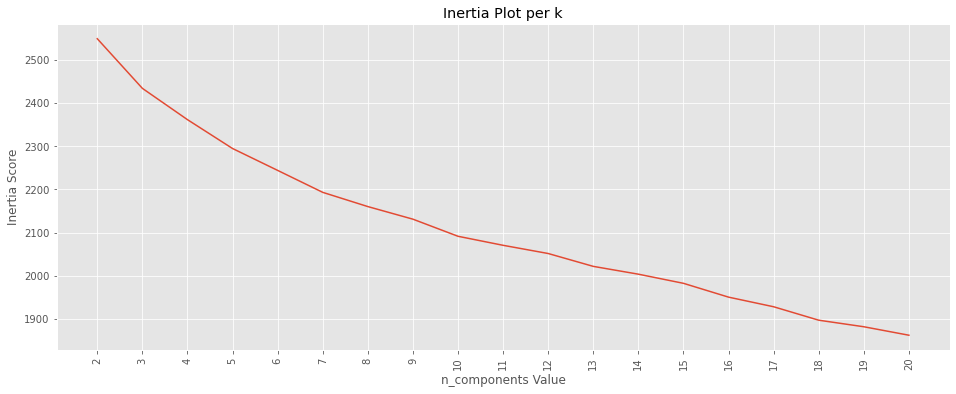

In [30]:
X_train = new_raw_data[new_features].values

# Running K means with multible Ks

no_of_clusters = range(2,21) #[2,3,4,5,6,7,8,9]
inertia = []


for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=2)
    kmeans = kmeans.fit(X_train)
    u = kmeans.inertia_
    inertia.append(u)
    print("The innertia for :", f, "Clusters is:", u)

    
# Creating the scree plot for Intertia - elbow method
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation='vertical')
plt.xlabel('n_components Value')
plt.ylabel('Inertia Score')
plt.title("Inertia Plot per k")

Explained variance ratio (first two components): [0.15061066 0.06422747]


<Figure size 432x288 with 0 Axes>

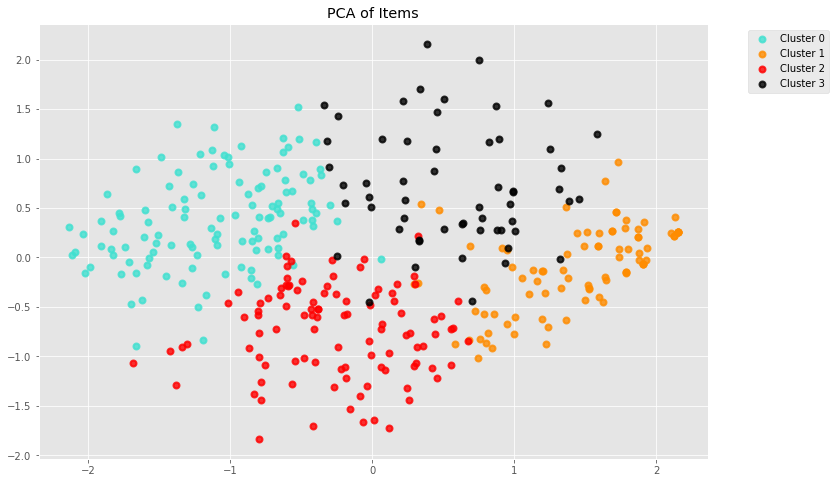

In [31]:
# Running K means on 5 clusters

kmeans = KMeans(n_clusters=4, random_state=2)
kmeans = kmeans.fit(X_train)

predictions = kmeans.predict(X_train)

# Running PCA to Visualize the data

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X = X_train
y_num = predictions

target_names = ["Cluster 0","Cluster 1","Cluster 2", "Cluster 3"]

pca = PCA(n_components=2, random_state = 453)
X_r = pca.fit(X).transform(X)


# Percentage of variance explained for each components
print('Explained variance ratio (first two components): %s' % str(pca.explained_variance_ratio_))

# Plotting the data
plt.figure()
plt.figure(figsize=(12,8))
colors = ['turquoise', 'darkorange', 'red', 'black']
lw = 2


for color, i, target_name in zip(colors, [0, 1, 2, 3], target_names):
    plt.scatter(X_r[y_num == i, 0], X_r[y_num == i, 1], color=color, alpha=.8, lw=lw,label=target_name)
    
plt.legend(loc='best', shadow=False, scatterpoints=3)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.6)   
plt.title('PCA of Items')
plt.show()

Total Variance in our dataset is:  7.90913656910643
The 95% variance we want to have is:  7.513679740651108

Variance explain with 30 n_compononets:  7.303387398045002
Variance explain with 35 n_compononets:  7.617313886443202
Variance explain with 33 n_compononets:  7.508799761403102
Variance explain with 40 n_compononets:  7.7885585737630505
Variance explain with 43 n_compononets:  7.857693361912744


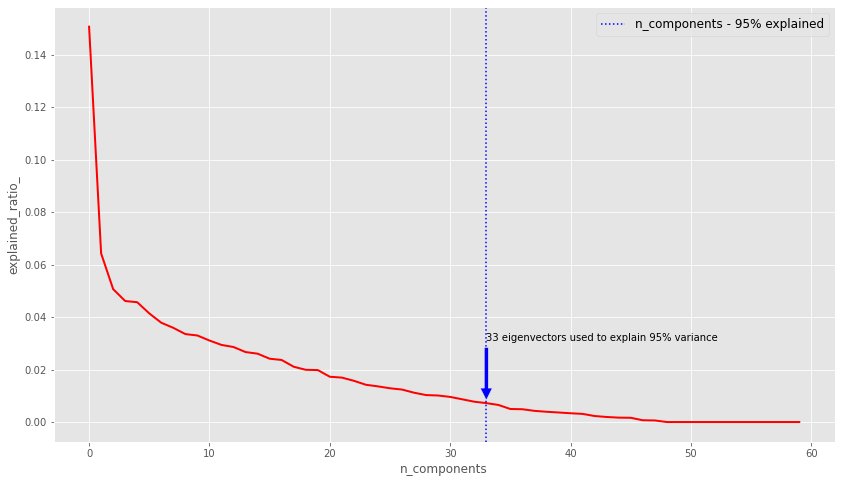

In [32]:
#Trying with Dimentionality reduction and then Kmeans

n_components = X.shape[1]

# Running PCA with all components
pca = PCA(n_components=n_components, random_state = 453)
X_r = pca.fit(X).transform(X)


# Calculating the 95% Variance
total_variance = sum(pca.explained_variance_)
print("Total Variance in our dataset is: ", total_variance)
var_95 = total_variance * 0.95
print("The 95% variance we want to have is: ", var_95)
print("")

# Creating a df with the components and explained variance
a = zip(range(0,n_components), pca.explained_variance_)
a = pd.DataFrame(a, columns=["PCA Comp", "Explained Variance"])

# Trying to hit 95%
print("Variance explain with 30 n_compononets: ", sum(a["Explained Variance"][0:30]))
print("Variance explain with 35 n_compononets: ", sum(a["Explained Variance"][0:35]))
print("Variance explain with 33 n_compononets: ", sum(a["Explained Variance"][0:33]))
print("Variance explain with 40 n_compononets: ", sum(a["Explained Variance"][0:40]))
print("Variance explain with 43 n_compononets: ", sum(a["Explained Variance"][0:43]))

# Plotting the Data
plt.figure(1, figsize=(14, 8))
plt.plot(pca.explained_variance_ratio_, linewidth=2, c="r")
plt.xlabel('n_components')
plt.ylabel('explained_ratio_')

# Plotting line with 95% e.v.
plt.axvline(33,linestyle=':', label='n_components - 95% explained', c ="blue")
plt.legend(prop=dict(size=12))

# adding arrow
plt.annotate('33 eigenvectors used to explain 95% variance', xy=(33, pca.explained_variance_ratio_[33]), xytext=(33, pca.explained_variance_ratio_[10]),
            arrowprops=dict(facecolor='blue', shrink=0.05))

plt.show()

The innertia for : 2 Clusters is: 2404.3450368541667
The innertia for : 3 Clusters is: 2290.0437076142625
The innertia for : 4 Clusters is: 2215.990321891358
The innertia for : 5 Clusters is: 2154.594617722217
The innertia for : 6 Clusters is: 2101.53749485646
The innertia for : 7 Clusters is: 2057.818480715514
The innertia for : 8 Clusters is: 2010.9516267077981
The innertia for : 9 Clusters is: 1985.3916900204847
The innertia for : 10 Clusters is: 1953.6010060044368
The innertia for : 11 Clusters is: 1923.1090606703042
The innertia for : 12 Clusters is: 1890.1396753153344
The innertia for : 13 Clusters is: 1869.4342058922355
The innertia for : 14 Clusters is: 1846.1025318560442
The innertia for : 15 Clusters is: 1833.862225796537
The innertia for : 16 Clusters is: 1809.8364172840556
The innertia for : 17 Clusters is: 1783.2009137114137
The innertia for : 18 Clusters is: 1760.1564481184816
The innertia for : 19 Clusters is: 1738.6525248876117
The innertia for : 20 Clusters is: 1728.54

Text(0.5, 1.0, 'Inertia Plot per k')

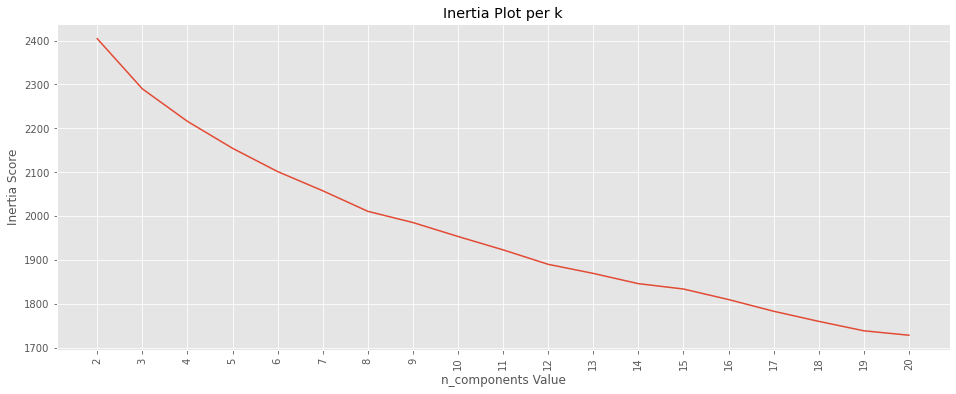

In [33]:
# Running PCA again

pca = PCA(n_components=33, random_state = 453)
X_r = pca.fit(X).transform(X)

inertia = []

#running Kmeans

for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=2)
    kmeans = kmeans.fit(X_r)
    u = kmeans.inertia_
    inertia.append(u)
    print("The innertia for :", f, "Clusters is:", u)

# Creating the scree plot for Intertia - elbow method
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation='vertical')
plt.xlabel('n_components Value')
plt.ylabel('Inertia Score')
plt.title("Inertia Plot per k")

In [34]:
new_features = [
'Q23_Always',
'Q23_Never',
'Q23_Often',
'Q23_Rarely',
'Q23_Sometimes',
'Q24_Always',
'Q24_Never',
'Q24_Often',
'Q24_Rarely',
'Q24_Sometimes',
'Q25_Always',
'Q25_Never',
'Q25_Often',
'Q25_Rarely',
'Q25_Sometimes',
'Q26_Always',
'Q26_Never',
'Q26_Often',
'Q26_Rarely',
'Q26_Sometimes',
'Q27_Always',
'Q27_Never',
'Q27_Often',
'Q27_Rarely',
'Q27_Sometimes',
'Q28_Always',
'Q28_Never',
'Q28_Often',
'Q28_Rarely',
'Q28_Sometimes',
'Q29_Always',
'Q29_Never',
'Q29_Often',
'Q29_Rarely',
'Q29_Sometimes',
'Q30_Always',
'Q30_Never',
'Q30_Often',
'Q30_Rarely',
'Q30_Sometimes']

The innertia for : 2 Clusters is: 1561.8864149332042
The innertia for : 3 Clusters is: 1460.2255881405097
The innertia for : 4 Clusters is: 1397.4853801169593
The innertia for : 5 Clusters is: 1332.9727591852597
The innertia for : 6 Clusters is: 1289.461429658084
The innertia for : 7 Clusters is: 1263.3422200719763
The innertia for : 8 Clusters is: 1232.2798987411045
The innertia for : 9 Clusters is: 1204.5491687166218
The innertia for : 10 Clusters is: 1179.3098179980927
The innertia for : 11 Clusters is: 1155.5771349221588
The innertia for : 12 Clusters is: 1135.2553319080967
The innertia for : 13 Clusters is: 1105.626718767159
The innertia for : 14 Clusters is: 1092.7996019830139
The innertia for : 15 Clusters is: 1077.6231868037407
The innertia for : 16 Clusters is: 1062.0054437982324
The innertia for : 17 Clusters is: 1050.0096395283722
The innertia for : 18 Clusters is: 1035.6745765135831
The innertia for : 19 Clusters is: 1023.2945695109498
The innertia for : 20 Clusters is: 100

Text(0.5, 1.0, 'Inertia Plot per k')

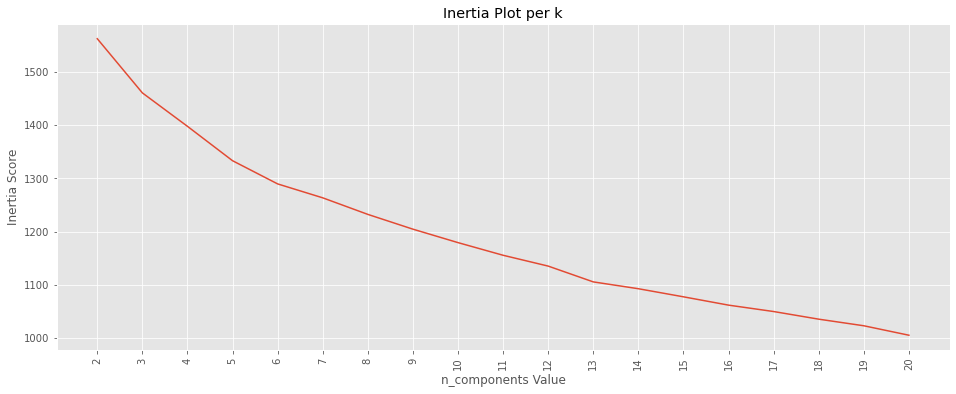

In [35]:
X_train = new_raw_data[new_features].values

# Running K means with multible Ks

no_of_clusters = range(2,21) #[2,3,4,5,6,7,8,9]
inertia = []


for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=2)
    kmeans = kmeans.fit(X_train)
    u = kmeans.inertia_
    inertia.append(u)
    print("The innertia for :", f, "Clusters is:", u)

    
# Creating the scree plot for Intertia - elbow method
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation='vertical')
plt.xlabel('n_components Value')
plt.ylabel('Inertia Score')
plt.title("Inertia Plot per k")

Explained variance ratio (first two components): [0.19607617 0.09078931]


<Figure size 432x288 with 0 Axes>

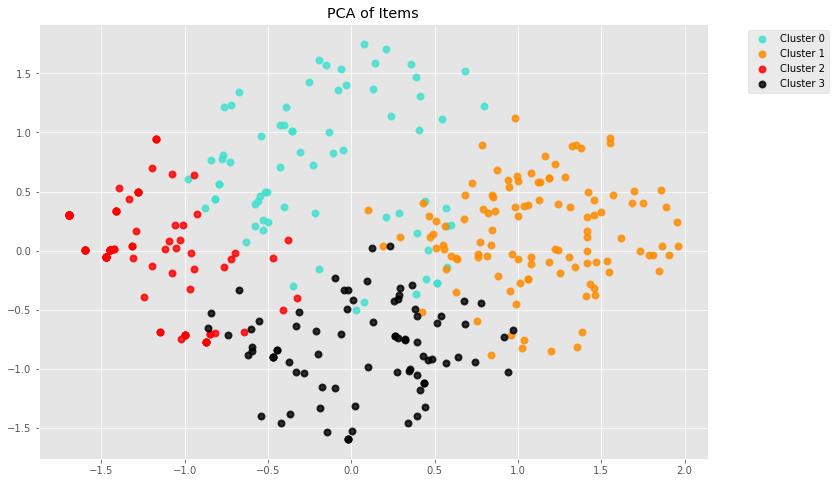

In [36]:
# Running K means on 5 clusters

kmeans = KMeans(n_clusters=4, random_state=2)
kmeans = kmeans.fit(X_train)

predictions = kmeans.predict(X_train)

# Running PCA to Visualize the data

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X = X_train
y_num = predictions

target_names = ["Cluster 0","Cluster 1","Cluster 2", "Cluster 3"]

pca = PCA(n_components=2, random_state = 453)
X_r = pca.fit(X).transform(X)


# Percentage of variance explained for each components
print('Explained variance ratio (first two components): %s' % str(pca.explained_variance_ratio_))

# Plotting the data
plt.figure()
plt.figure(figsize=(12,8))
colors = ['turquoise', 'darkorange', 'red', 'black']
lw = 2


for color, i, target_name in zip(colors, [0, 1, 2, 3], target_names):
    plt.scatter(X_r[y_num == i, 0], X_r[y_num == i, 1], color=color, alpha=.8, lw=lw,label=target_name)
    
plt.legend(loc='best', shadow=False, scatterpoints=3)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.6)   
plt.title('PCA of Items')
plt.show()

Total Variance in our dataset is:  5.054289758458518
The 95% variance we want to have is:  4.801575270535592

Variance explain with 15 n_compononets:  4.231628400065634
Variance explain with 20 n_compononets:  4.686091975787749
Variance explain with 23 n_compononets:  4.8510648521655435


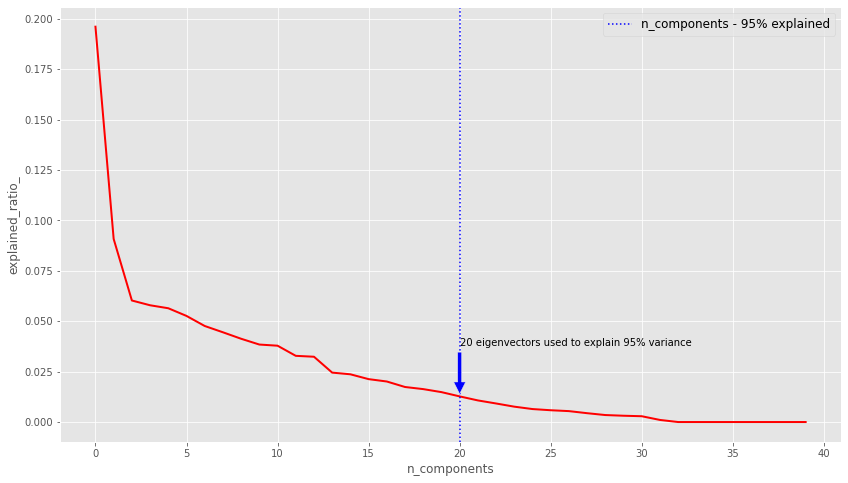

In [37]:
#Trying with Dimentionality reduction and then Kmeans

n_components = X.shape[1]

# Running PCA with all components
pca = PCA(n_components=n_components, random_state = 453)
X_r = pca.fit(X).transform(X)


# Calculating the 95% Variance
total_variance = sum(pca.explained_variance_)
print("Total Variance in our dataset is: ", total_variance)
var_95 = total_variance * 0.95
print("The 95% variance we want to have is: ", var_95)
print("")

# Creating a df with the components and explained variance
a = zip(range(0,n_components), pca.explained_variance_)
a = pd.DataFrame(a, columns=["PCA Comp", "Explained Variance"])

# Trying to hit 95%
print("Variance explain with 15 n_compononets: ", sum(a["Explained Variance"][0:15]))
print("Variance explain with 20 n_compononets: ", sum(a["Explained Variance"][0:20]))
print("Variance explain with 23 n_compononets: ", sum(a["Explained Variance"][0:23]))

# Plotting the Data
plt.figure(1, figsize=(14, 8))
plt.plot(pca.explained_variance_ratio_, linewidth=2, c="r")
plt.xlabel('n_components')
plt.ylabel('explained_ratio_')

# Plotting line with 95% e.v.
plt.axvline(20,linestyle=':', label='n_components - 95% explained', c ="blue")
plt.legend(prop=dict(size=12))

# adding arrow
plt.annotate('20 eigenvectors used to explain 95% variance', xy=(20, pca.explained_variance_ratio_[20]), xytext=(20, pca.explained_variance_ratio_[10]),
            arrowprops=dict(facecolor='blue', shrink=0.05))

plt.show()

The innertia for : 2 Clusters is: 1428.6401095948395
The innertia for : 3 Clusters is: 1327.2855238926425
The innertia for : 4 Clusters is: 1262.1327730950686
The innertia for : 5 Clusters is: 1210.1481919310065
The innertia for : 6 Clusters is: 1156.9022709414662
The innertia for : 7 Clusters is: 1122.2053446790594
The innertia for : 8 Clusters is: 1091.9616316036597
The innertia for : 9 Clusters is: 1064.7375783022273
The innertia for : 10 Clusters is: 1038.0798916201582
The innertia for : 11 Clusters is: 1013.182857630585
The innertia for : 12 Clusters is: 998.0002755631423
The innertia for : 13 Clusters is: 981.3164524448869
The innertia for : 14 Clusters is: 962.0624824412495
The innertia for : 15 Clusters is: 946.9943613820849
The innertia for : 16 Clusters is: 921.2080557432929
The innertia for : 17 Clusters is: 909.9577312120772
The innertia for : 18 Clusters is: 893.2495121676216
The innertia for : 19 Clusters is: 884.5286521843246
The innertia for : 20 Clusters is: 868.438602

Text(0.5, 1.0, 'Inertia Plot per k')

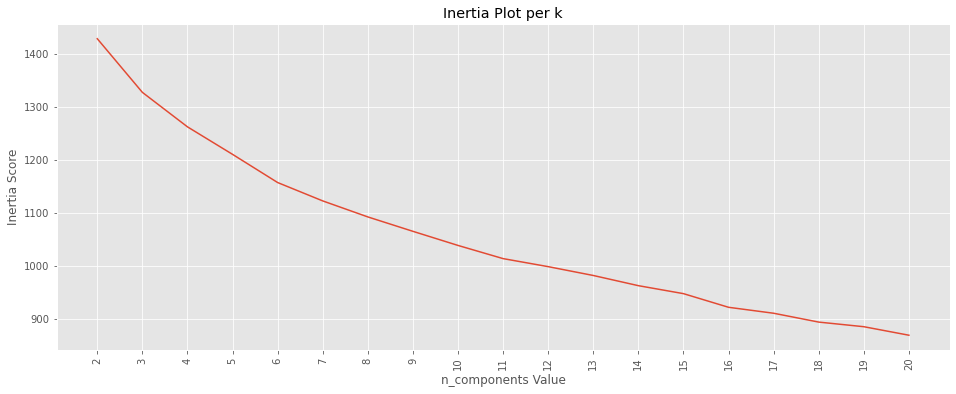

In [38]:
# Running PCA again

pca = PCA(n_components=20, random_state = 453)
X_r = pca.fit(X).transform(X)

inertia = []

#running Kmeans

for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=2)
    kmeans = kmeans.fit(X_r)
    u = kmeans.inertia_
    inertia.append(u)
    print("The innertia for :", f, "Clusters is:", u)

# Creating the scree plot for Intertia - elbow method
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation='vertical')
plt.xlabel('n_components Value')
plt.ylabel('Inertia Score')
plt.title("Inertia Plot per k")

In [39]:
new_features = [
'Q28_Always',
'Q28_Never',
'Q28_Often',
'Q28_Rarely',
'Q28_Sometimes',
'Q29_Always',
'Q29_Never',
'Q29_Often',
'Q29_Rarely',
'Q29_Sometimes',
'Q30_Always',
'Q30_Never',
'Q30_Often',
'Q30_Rarely',
'Q30_Sometimes']

The innertia for : 2 Clusters is: 557.6263647642681
The innertia for : 3 Clusters is: 481.0970342651689
The innertia for : 4 Clusters is: 425.9138764204964
The innertia for : 5 Clusters is: 386.11581664746836
The innertia for : 6 Clusters is: 348.7888417455311
The innertia for : 7 Clusters is: 309.0477396448668
The innertia for : 8 Clusters is: 306.393021911282
The innertia for : 9 Clusters is: 274.8644907362873
The innertia for : 10 Clusters is: 257.31886178996604
The innertia for : 11 Clusters is: 232.388787154573
The innertia for : 12 Clusters is: 212.59282344367335
The innertia for : 13 Clusters is: 193.95460614561324
The innertia for : 14 Clusters is: 184.35024181923737
The innertia for : 15 Clusters is: 168.05334740929962
The innertia for : 16 Clusters is: 155.8962937194186
The innertia for : 17 Clusters is: 147.57130392182142
The innertia for : 18 Clusters is: 138.44064865116613
The innertia for : 19 Clusters is: 133.69792061386894
The innertia for : 20 Clusters is: 124.23092167

Text(0.5, 1.0, 'Inertia Plot per k')

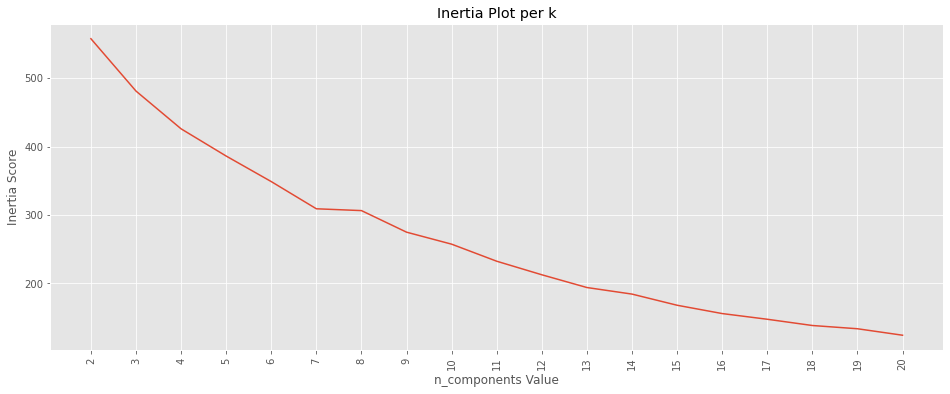

In [40]:
X_train = new_raw_data[new_features].values

# Running K means with multible Ks

no_of_clusters = range(2,21) #[2,3,4,5,6,7,8,9]
inertia = []


for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=2)
    kmeans = kmeans.fit(X_train)
    u = kmeans.inertia_
    inertia.append(u)
    print("The innertia for :", f, "Clusters is:", u)

    
# Creating the scree plot for Intertia - elbow method
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation='vertical')
plt.xlabel('n_components Value')
plt.ylabel('Inertia Score')
plt.title("Inertia Plot per k")

Explained variance ratio (first two components): [0.3029249  0.14086594]


<Figure size 432x288 with 0 Axes>

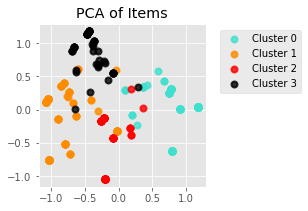

In [41]:
# Running K means on 5 clusters

kmeans = KMeans(n_clusters=4, random_state=2)
kmeans = kmeans.fit(X_train)

predictions = kmeans.predict(X_train)

# Running PCA to Visualize the data

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X = X_train
y_num = predictions

target_names = ["Cluster 0","Cluster 1","Cluster 2", "Cluster 3"]

pca = PCA(n_components=2, random_state = 453)
X_r = pca.fit(X).transform(X)


# Percentage of variance explained for each components
print('Explained variance ratio (first two components): %s' % str(pca.explained_variance_ratio_))

# Plotting the data
plt.figure()
plt.figure(figsize=(3,3))
colors = ['turquoise', 'darkorange', 'red', 'black']
lw = 2


for color, i, target_name in zip(colors, [0, 1, 2, 3], target_names):
    plt.scatter(X_r[y_num == i, 0], X_r[y_num == i, 1], color=color, alpha=.8, lw=lw,label=target_name)
    
plt.legend(loc='best', shadow=False, scatterpoints=3)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.6)   
plt.title('PCA of Items')
plt.show()

In [42]:
import hvplot.pandas
df.hvplot(x='28 CODE', y=['29 CODE', '30 CODE'], kind='scatter')

ImportError: cannot import name 'Nullable' from 'bokeh.core.properties' (/opt/anaconda3/lib/python3.8/site-packages/bokeh/core/properties.py)

In [63]:
pip install hvplot

     |████████████████████████████████| 3.1 MB 3.2 MB/s eta 0:00:01     |████████████████▊               | 1.6 MB 3.2 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 9.0 MB/s eta 0:00:01
     |████████████████████████████████| 4.3 MB 10.5 MB/s eta 0:00:01
     |████████████████████████████████| 79 kB 6.5 MB/s  eta 0:00:01
     |████████████████████████████████| 40 kB 4.3 MB/s eta 0:00:011
     |████████████████████████████████| 9.0 MB 3.0 MB/s eta 0:00:01
ERROR: panel 0.11.3 has requirement bokeh<2.4.0,>=2.3.0, but you'll have bokeh 2.1.1 which is incompatible.
Note: you may need to restart the kernel to use updated packages.
